In [1]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob

import pandas as pd
import seaborn as sns
from scipy import fftpack
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.HRVanalysis as ha
import brainsignal.bodediagram as bd
import brainsignal.transferfunction as tf

# This makes the plots appear inside the notebook
%matplotlib inline

### Data 

We will test the ARMA method on blood pressure with radial ABP as input and aortic ABP as output.

##### Data loading

In [2]:
rep='../../data/'
patientdir='ID_2'

file=glob.glob(rep+patientdir+'/WAVE_ABP.txt', recursive=True)[0]

data=pd.read_csv(file,header=None, decimal=',', delimiter='\n')
data_array=np.array(data.values)
ABP_signal=data_array.transpose()[0]

In [3]:
fs=200 #Hz
ABP_time=np.arange(len(ABP_signal))/fs

In [4]:
file=glob.glob(rep+patientdir+'/WAVE_ABP_AORTIC.txt', recursive=True)[0]

data=pd.read_csv(file,header=None, decimal=',', delimiter='\n')
data_array=np.array(data.values)
ABPaortic_signal=data_array.transpose()[0]

In [5]:
fs=200
ABPa_time=np.arange(len(ABPaortic_signal))/fs

In [ ]:
# 5 seconds time scale
time=1 #beginning of the visualisation window in hour

plt.plot(ABP_time,ABP_signal)
plt.plot(ABPa_time,ABPaortic_signal)

plt.title('Comparison radial ABP and aortic ABP data')
plt.ylabel('mmHg')
plt.xlabel('time(h)')

plt.xlim([time*60*60,time*60*60+5])

##### System identification

 Method using the cross power spectral density, Pxy, using Welch’s method.

In [30]:
freq,mag,phas,time =tf.tf_crosspower(ABPaortic_signal,ABP_signal, size_window=600, times=ABPa_time)

In [31]:
print(np.shape(mag))
print(np.shape(time))

(128, 147)
(147,)


In [32]:
mag

array([[ 1.02823585e+00,  8.74746566e-01,  7.88028021e-01, ...,
         2.27009087e-02,  6.14180896e-01, -1.11547333e+00],
       [ 1.54190571e+00,  1.44358714e+00,  1.35593927e+00, ...,
         1.16523048e+00,  1.49063529e+00, -6.00677344e-01],
       [ 2.78347474e+00,  2.68848021e+00,  3.05872776e+00, ...,
         7.10157903e-01, -1.04146633e+00, -1.78497480e+00],
       ...,
       [ 6.90126126e+01,  7.29387318e+01,  7.04237825e+01, ...,
         6.89266022e+01,  5.54371196e+01,  4.78847216e+01],
       [ 6.73366026e+01,  6.76495356e+01,  6.41541995e+01, ...,
         6.46994045e+01,  6.19807380e+01,  6.42810705e+01],
       [ 7.28538601e+01,  7.43742905e+01,  6.05230790e+01, ...,
         6.47325437e+01,  7.41851967e+01,  5.65431376e+01]])

### Plot

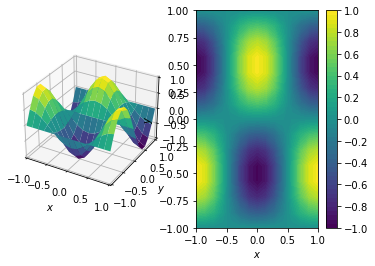

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

# generate example data
import numpy as np
x,y = np.meshgrid(np.linspace(-1,1,15),np.linspace(-1,1,15))
z = np.cos(x*np.pi)*np.sin(y*np.pi)

# actual plotting example
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis')
ax2 = fig.add_subplot(122)
cf = ax2.contourf(x,y,z,51,vmin=-1,vmax=1,cmap='viridis')
cbar = fig.colorbar(cf)
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()
for ax in {ax1, ax2}:
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_aspect('auto')

ax1.set_zlim([-1,1])
#ax1.set_zlabel(r'$\cos(\pi x) \sin(\p    i y)$')

plt.show()

### Plot magnitude

Text(0.5, 1.0, 'Color-scaled gain of TF identified ')

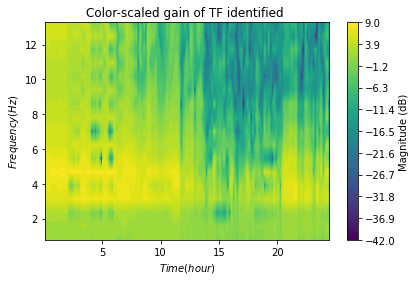

In [48]:
indices=da.indexseq(0,14,freq)

fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time,freq[indices],mag[indices,:],51,cmap='viridis')
cbar = fig.colorbar(cf, label='Magnitude (dB)')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (hour)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled gain of TF identified ')

In [55]:
it=np.where(np.array(time)>=9)[0][0]

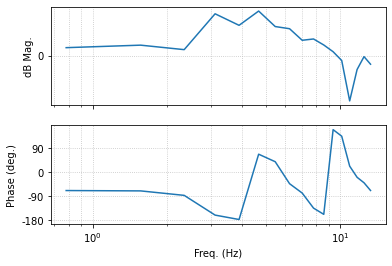

In [56]:
bd.bode_plot(freq[indices],mag[indices,it],phas[indices,it])

Text(0, 0.5, 'Amplitude')

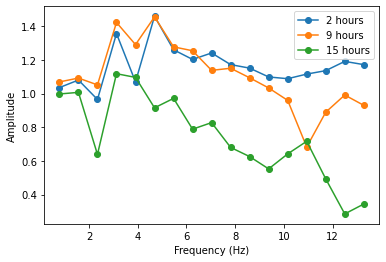

In [59]:
plt.plot(freq[indices],np.exp(mag[indices,12]/20),'-o', label='2 hours')
plt.plot(freq[indices],np.exp(mag[indices,54]/20),'-o', label='9 hours')
plt.plot(freq[indices],np.exp(mag[indices,90]/20),'-o', label='15 hours')
plt.legend()
it2=np.where(np.array(time)>=15)[0][0]
#plt.plot(freq[indices],np.exp(mag[indices,it]/20),'-o', label='15 hours')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
# ajouter axes 

#### 3D

ValueError: shape mismatch: objects cannot be broadcast to a single shape

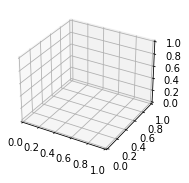

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(time,freq,mag,cmap='viridis')
ax1.set_xlabel(r'$Time (s)$')
ax1.set_ylabel(r'$Frequency (Hz)$')
ax1.set_aspect('auto')
plt.title('Color-scaled gain of TF identified ')
plt.show()

In [ ]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
import numpy as np 

# Creating figure
fig = plt.figure(figsize =(16, 9))  
ax = plt.axes(projection ='3d')  
  
# Creating color map
my_cmap = plt.get_cmap('hot')
    
# Creating plot
trisurf = ax.plot_trisurf(time[0:128], freq, mag,
                         cmap = my_cmap,
                         linewidth = 0.2, 
                         antialiased = True,
                         edgecolor = 'grey')  
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('Tri-Surface plot')

### Plot phase

Text(0.5, 1.0, 'Color-scaled phase of TF identified')

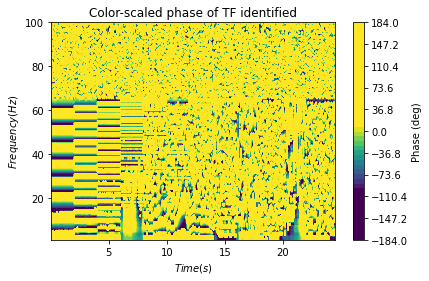

In [22]:
fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time,freq,phas,51,vmin=-100,vmax=10,cmap='viridis')
cbar = fig.colorbar(cf, label='Phase (deg)')
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()

ax.set_xlabel(r'$Time (s)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled phase of TF identified')

In [ ]:
phase